<a href="https://colab.research.google.com/github/Ardalan-gerami81/HW_ML/blob/main/Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import cvxpy as cvx
import matplotlib.pyplot as plt
import matplotlib
from opt_evac_data import *

In [37]:
def arr(_):
    return np.array(_.value)
def optimal_evacuation(A, Q, F, q1, r, r_tilda, s, s_tilda, T):
  ## as we know we have n nodes and m edges which their communication save in A matrix
  n,m = A.shape
  q = cvx.Variable((n,T))
  f = cvx.Variable((m,T-1))
  # as said in question r^T*q+(q^2)^T*s population evacuation(node risk)
  node_risk = q.T@r + cvx.square(q).T@s
  # as said in question r~.T*|f| + s~.T*f^2(edge risk)
  edge_risk = cvx.hstack([cvx.abs(f).T@r_tilda.T + cvx.square(f).T@s_tilda.T,0])
  # R_tot = r.T*q + cvx.square(q).T*s + r~.T*|f| + s~.T*f^2(edge risk)
  total_risk = node_risk + edge_risk
  # constraints of our problem
  constraints = [q[:,0] == q1,q[:,1:] == A*f + q[:,:-1],0 <= q, q <= np.tile(Q,(T,1)).T,cvx.abs(f) <= np.tile(F,(T-1,1)).T]
  p = cvx.Problem(cvx.Minimize(sum(total_risk)), constraints)
  p.solve(verbose=True, solver=cvx.ECOS)
  q, f, qrisk, node_risk = map(lambda _: arr(_), (q, f, total_risk, node_risk))
  print("Time of Evacuation =", (node_risk <= 1e-4).nonzero()[0][0] + 1)
  print("Total risk:", p.value)
  return q, f, qrisk, node_risk


                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) Jul 04 10:40:21 PM: Your problem has 501 variables, 5 constraints, and 0 parameters.
(CVXPY) Jul 04 10:40:21 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jul 04 10:40:21 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jul 04 10:40:21 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jul 04 10:40:21 PM: Compiling problem (target solver=ECOS).
(CVXPY) Jul 04 10:40:21 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -

/usr/local/lib/python3.10/dist-packages/cvxpy/expressions/expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 8 times so far.

  warnings.warn(msg, UserWarning)


(CVXPY) Jul 04 10:40:21 PM: Finished problem compilation (took 2.522e-01 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Jul 04 10:40:21 PM: Invoking solver ECOS  to obtain a solution.
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Jul 04 10:40:22 PM: Problem status: optimal
(CVXPY) Jul 04 10:40:22 PM: Optimal value: 6.590e+00
(CVXPY) Jul 04 10:40:22 PM: Compilation took 2.522e-01 seconds
(CVXPY) Jul 04 10:40:22 PM: Solver (including time spent in interface) took 5.441e-01 seconds
Time of Evacuation = 17
Total risk: 6.589671916236878

plot of total risk :


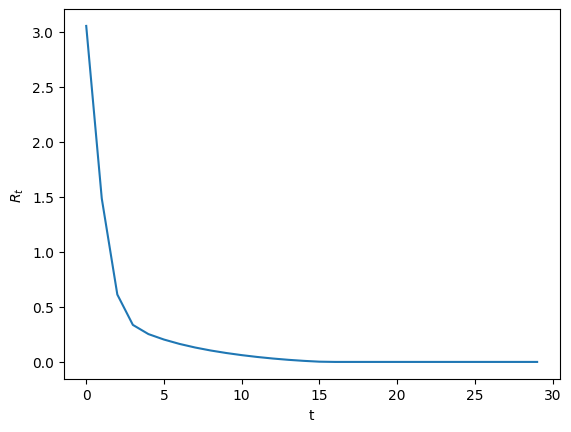

plot of capacity of nodes :


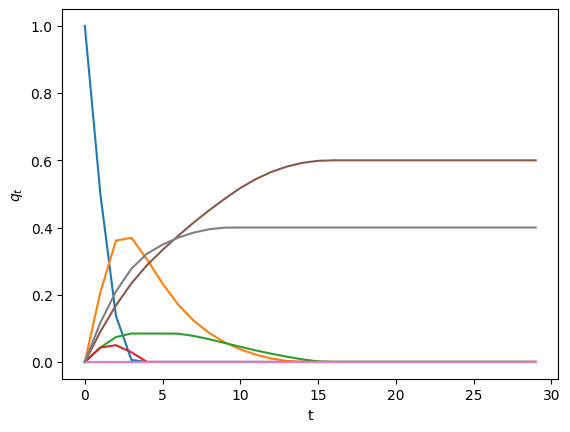

plot of population movement (flow) across the edges :


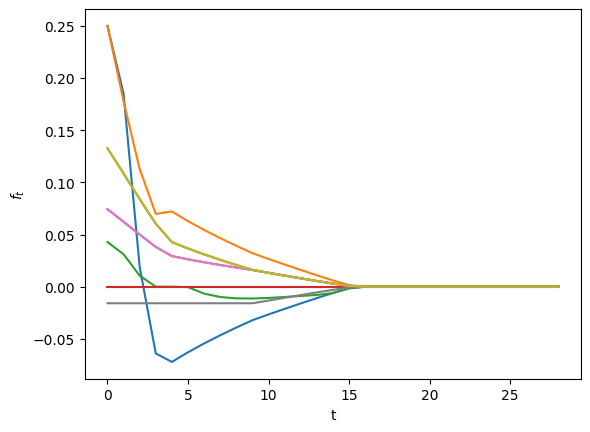

In [38]:
q, f, totl_risk, node_risk = optimal_evacuation(A, Q, F, q1, r, r_tilda, s, s_tilda, T)
print()
print('plot of total risk :')
plt.xlabel("t")
plt.ylabel("$R_t$")
plt.plot(totl_risk)
plt.show()
print('plot of capacity of nodes :')
plt.xlabel("t")
plt.ylabel("$q_t$")
plt.plot(q.T)
plt.show()
print('plot of population movement (flow) across the edges :')
plt.xlabel("t")
plt.ylabel("$f_t$")
plt.plot(f.T)
plt.show()
